<a href="https://colab.research.google.com/github/lKhanl/newton-s-divided-difference-interpolation/blob/main/Newton's_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Inputs

In [ ]:
x = np.array([20, 21, 23, 24, 25, 27, 29, 30])
y = np.array([346, 362, 343, 339, 347, 346, 339, 394])

In [ ]:
def NNDcoeffs(x, y):
  n = np.shape(y)[0]
  pyramid = np.zeros([n,n])
  pyramid[::,0] = y
  for i in range(1,n):
    for j in range(n-i):
      pyramid[j][i] = (pyramid[j+1][i-1] - pyramid[j][i-1]) / (x[j+i] - x[j])
  return pyramid[0]       

In [ ]:
coeff_vector = NNDcoeffs(x, y)
print(coeff_vector)

[ 3.46000000e+02  1.60000000e+01 -8.50000000e+00  2.58333333e+00
 -3.08333333e-01 -3.33333333e-02  1.73032407e-02 -2.82352293e-03]


In [ ]:
final_pol = np.polynomial.Polynomial([0.])
n = coeff_vector.shape[0]

In [ ]:
for i in range(n):
  p = np.polynomial.Polynomial([1.])
  for j in range(i):
    p_temp = np.polynomial.Polynomial([-x[j], 1.])
    p = np.polymul(p, p_temp)
  p *= coeff_vector[i]
  final_pol = np.polyadd(final_pol, p)  

In [ ]:
p = np.flip(final_pol[0].coef, axis=0)
print(p)

[-2.82352293e-03  4.94478616e-01 -3.69310020e+01  1.52481540e+03
 -3.75874867e+04  5.53179086e+05 -4.50050568e+06  1.56149395e+07]


In [ ]:
Ploting

In [ ]:
x_axis = np.linspace(20, 30, num=5000)
y_axis = np.polyval(p, x_axis)

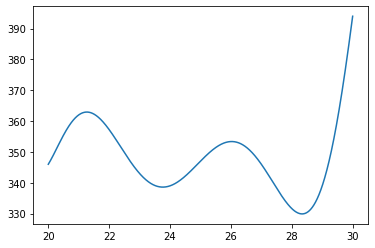

In [ ]:
plt.plot(x_axis, y_axis)
plt.show()

In [ ]:
print(np.polyval(p,26))

353.3607143983245
